In [ ]:
 pip install gensim konlpy kiwipiepy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import time
from tqdm.notebook import tqdm
import time, pickle, os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from konlpy.tag import Okt
from collections import Counter
from kiwipiepy import Kiwi
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.cluster import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import TruncatedSVD

import html
import gensim
from gensim import corpora, models
from gensim.corpora import Dictionary

In [ ]:
import pickle

with open('/content/drive/My Drive/data/DCX/CX 프로젝트/total_cluster.pkl','rb') as f:
    df = pickle.load(f)

In [ ]:
df0 = df[df['cluster'] == 0]
df1 = df[df['cluster'] == 1]
df2 = df[df['cluster'] == 2]
df3 = df[df['cluster'] == 3]
df4 = df[df['cluster'] == 4]

In [ ]:
def remove_short_tokens(tokens, min_len=2):
    return [t for t in tokens if len(t) >= min_len]

df0["article_words"] = df0["article_words"].apply(lambda x: remove_short_tokens(x, min_len=2))
df1["article_words"] = df1["article_words"].apply(lambda x: remove_short_tokens(x, min_len=2))
df2["article_words"] = df2["article_words"].apply(lambda x: remove_short_tokens(x, min_len=2))
df3["article_words"] = df3["article_words"].apply(lambda x: remove_short_tokens(x, min_len=2))
df4["article_words"] = df4["article_words"].apply(lambda x: remove_short_tokens(x, min_len=2))

**코드 반복**

In [ ]:
all_documents = list(df4['article_words'])
dictionary = corpora.Dictionary(all_documents)
dictionary.filter_extremes(no_below=3, no_above=0.8)
corpus = [dictionary.doc2bow(doc) for doc in all_documents]

In [ ]:
topic_num = 3

ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = topic_num, id2word = dictionary, passes = 20, iterations= 50, random_state= 42)


In [ ]:
ldamodel.print_topics(num_words = 5)

[(0, '0.017*"대회" + 0.012*"출발" + 0.011*"달리기" + 0.009*"수영" + 0.008*"시작"'),
 (1, '0.037*"대회" + 0.014*"기록" + 0.014*"출발" + 0.014*"완주" + 0.013*"페이스"'),
 (2, '0.066*"러닝" + 0.046*"트레일" + 0.015*"대회" + 0.008*"운동" + 0.007*"시작"')]

In [ ]:
from gensim.models import CoherenceModel #coherence 모델 라이브러리
import matplotlib.pyplot as plt #그래프 그리기
import numpy as np

In [ ]:
for i in range(0,21):
    print(ldamodel.get_document_topics(corpus[i]))

[(0, 0.130632), (1, 0.86644584)]
[(1, 0.99642205)]
[(1, 0.99399215)]
[(1, 0.9894933)]
[(0, 0.21778876), (1, 0.77633995)]
[(1, 0.7219024), (2, 0.2753553)]
[(1, 0.9943809)]
[(0, 0.059064947), (1, 0.92226946), (2, 0.018665595)]
[(0, 0.04018531), (1, 0.9557482)]
[(1, 0.9968939)]
[(0, 0.11844738), (2, 0.8792503)]
[(1, 0.99687725)]
[(0, 0.24143949), (1, 0.7531903)]
[(0, 0.19063203), (1, 0.80464536)]
[(0, 0.13564448), (1, 0.85855275)]
[(1, 0.9968022)]
[(2, 0.9955981)]
[(1, 0.90243554), (2, 0.095927104)]
[(0, 0.49135482), (1, 0.5051869)]
[(2, 0.9914431)]
[(1, 0.9969654)]


In [ ]:
perplexity_score = ldamodel.log_perplexity(corpus)
perplexity_score

-7.333336507863429

In [ ]:
top_n = 3
coherence_model = CoherenceModel(model=ldamodel, texts= all_documents, dictionary=dictionary, topn = top_n)
coherence_score = coherence_model.get_coherence()
coherence_score

0.6331986653167703

In [ ]:
perplexity_values = []

for i in tqdm(range(2,10)):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word = dictionary)
    perplexity_v = ldamodel.log_perplexity(corpus)
    perplexity_values.append(perplexity_v)

  0%|          | 0/8 [00:00<?, ?it/s]

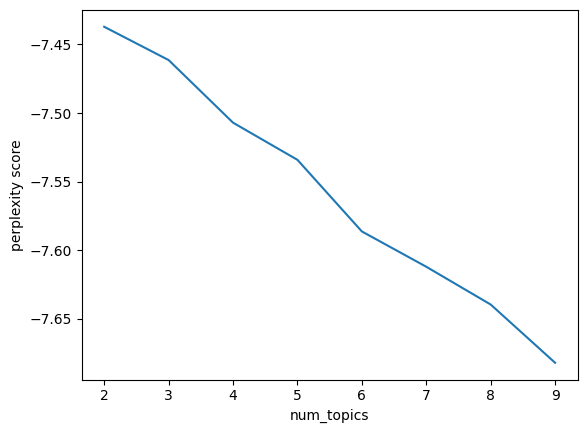

In [ ]:
x = range(2,10)
plt.plot(x, perplexity_values)
plt.xlabel('num_topics')
plt.ylabel('perplexity score')
plt.show()

In [ ]:
cohernce_values = []
top_n = 3

for i in tqdm(range(2,10)):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word = dictionary)

    coherence_model = CoherenceModel(model=ldamodel, texts= all_documents, dictionary=dictionary, topn = top_n)
    coherence_v = coherence_model.get_coherence()
    cohernce_values.append(coherence_v)

  0%|          | 0/8 [00:00<?, ?it/s]

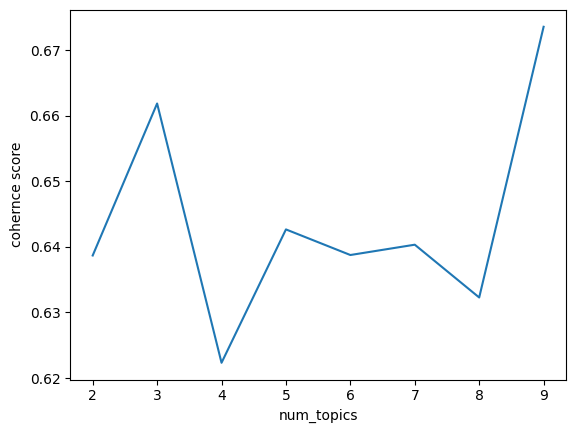

In [ ]:
x = range(2,10)
plt.plot(x, cohernce_values)
plt.xlabel('num_topics')
plt.ylabel('cohernce score')
plt.show()

In [ ]:
topic_num = 3

ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = topic_num, id2word = dictionary, passes = 20, iterations= 50, random_state= 42)

In [ ]:
action_align = []

for doc in tqdm(ldamodel.get_document_topics(corpus)):
    label = []
    value = []

    for score in doc:
        label.append(score[0])
        value.append(score[1])

    max_index = np.argmax(value) #확률이 가장 큰 값(value값이 큰값들만 선택해서 인덱스로)
    action_align.append(label[max_index])

  0%|          | 0/1283 [00:00<?, ?it/s]

In [ ]:
df4['action_cluster'] = action_align

In [ ]:
pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 39.2 MB/s eta 0:00:00


In [ ]:
#경고무시
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#LDA 시각화 라이브러리
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [ ]:
prepared_data = gensimvis.prepare(ldamodel, corpus, dictionary)
#pyLDAvis.save_html(prepared_data, '/content/drive/My Drive/data/DCX/CX 프로젝트/total_cluster4.html')
pyLDAvis.display(prepared_data)

In [ ]:
topics = ldamodel.show_topics(num_words = 7, formatted=True)


for id , topic_desc in topics:
    print(f'topic id : {id}, description : {topic_desc}')

topic id : 0, description : 0.017*"대회" + 0.012*"출발" + 0.011*"달리기" + 0.009*"수영" + 0.008*"시작" + 0.007*"자전거" + 0.007*"러닝"
topic id : 1, description : 0.037*"대회" + 0.014*"기록" + 0.014*"출발" + 0.014*"완주" + 0.013*"페이스" + 0.011*"달리기" + 0.010*"참가"
topic id : 2, description : 0.066*"러닝" + 0.046*"트레일" + 0.015*"대회" + 0.008*"운동" + 0.007*"시작" + 0.006*"구간" + 0.005*"오름"


In [ ]:
new_action_topic = []

for i in tqdm(df4.action_cluster):
    if i == 0:
        n = 1
    elif i == 1 :
        n = 2
    elif i == 2 :
        n = 3
    elif i == 3 :
        n = 4
    #else :
    #    n = 5
    new_action_topic.append(n)


  0%|          | 0/1283 [00:00<?, ?it/s]

In [ ]:
df4.action_cluster = new_action_topic

In [ ]:
df4['action_cluster'].value_counts()

,count
action_cluster,
2,854
3,290
1,139


In [ ]:
df3 = df3[['article','re_article','article_words','cluster','action_cluster']]

In [ ]:
df3.to_csv('/content/drive/My Drive/data/DCX/CX 프로젝트/total_cluster3.csv', encoding = 'utf-8-sig')

import pickle

with open('/content/drive/My Drive/data/DCX/CX 프로젝트/total_cluster3.pkl', 'wb') as f:
    pickle.dump(df3, f)

In [ ]:
df4

,article,re_article,article_words,cluster,action_cluster
13,2025년 제 17회 여명 마라톤 10km 달리기 후기 생애 첫 10km 마라톤 대...,년 제 회 여명 마라톤 km 달리기 후기 생애 첫 km 마라톤 대회에 참가했다. ...,"[여명, 달리기, 생애, 대회, 참가, 올해, 버킷, 리스트, 세수, 바나나, 출발...",4,2
37,스마일런 페스티벌 하프코스 완주를 하였습니다. 23춘천마라톤대회 풀코스 도전을 위한...,스마일런 페스티벌 하프코스 완주를 하였습니다. 춘천마라톤대회 풀코스 도전을 위한 훈...,"[스마일, 페스티벌, 완주, 대회, 도전, 훈련, 일지, 포스팅, 스마일, 페스티벌...",4,2
59,2024 공주백제 마라톤 2024 공주백제 마라톤- 하프코스2024.09.22 (일...,공주백제 마라톤 공주백제 마라톤 하프코스 . . 일 나의 첫 하프 마라톤공주백제 ...,"[공주, 백제, 공주, 백제, 공주, 백제, 기록, 개월, 어유, 크루, 홧김, 하...",4,2
113,제물포르네상스 국제마라톤 10K 후기[제물포르네상스 국제마라톤 10K 후기]\n이번...,제물포르네상스 국제마라톤 K 후기 제물포르네상스 국제마라톤 K 후기 이번이 두 번째...,"[제물포, 르네상스, 국제, 제물포, 르네상스, 국제, 대회, 초반, 페이스메이커,...",4,2
128,제18회 선사마라톤축제 하프 PB강동TR에 어깨입니다.\n그동안 10K 대회들만 참...,제 회 선사마라톤축제 하프 PB강동TR에 어깨입니다. 그동안 K 대회들만 참가했었고...,"[선사, 축제, 강동, 어깨, 그동안, 대회, 참가, 올해, 시작, 선사, 세번, ...",4,2
...,...,...,...,...,...
18665,컴포트 100일 염원달리기 3기 12일차 _ 우중런 (Running in the r...,컴포트 일 염원달리기 기 일차 우중런 Running in the rain 어제 경험...,"[포트, 염원, 달리기, 일차, 우중, 경험, 염원, 달리기, 에너지, 오후, 소진...",4,2
18670,내일이 바로 그날! 마라톤 하프코스 최종 준비 훈련 러닝 마라톤 하프코스 최종 준비...,내일이 바로 그날! 마라톤 하프코스 최종 준비 훈련 러닝 마라톤 하프코스 최종 준비...,"[그날, 최종, 준비, 훈련, 러닝, 최종, 준비, 훈련, 러닝, 캐리, 우드, 결...",4,2
18671,[아침 달리기] 클럽 트레일러닝 동네 마라톤 클럽 모임 날입니다. 동네 산 둘레길 ...,아침 달리기 클럽 트레일러닝 동네 마라톤 클럽 모임 날입니다. 동네 산 둘레길 트...,"[달리기, 클럽, 트레일, 러닝, 동네, 클럽, 모임, 동네, 둘레길, 트레일, 러...",4,3
18699,제 18회 달구벌 마라톤 하프코스 참가 후기 11월 10일 강정보에서 열렸던 제 1...,제 회 달구벌 마라톤 하프코스 참가 후기 월 일 강정보에서 열렸던 제 회 달구벌 마...,"[달구벌, 참가, 강정보, 달구벌, 참가, 러닝, 본격, 시작, 도전, 목표, 중간...",4,2
